In [74]:
from fastai import *
import fastai_audio
from fastai.vision import *

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import librosa.display
import IPython.display as ipd
import librosa

import scipy
import time
import tqdm

import seaborn as sns
from sklearn import manifold, datasets
from sklearn.manifold import TSNE

import PIL

ModuleNotFoundError: ignored

In [51]:
x, sr = librosa.load(
    'pos-0422-096-cough-m-31-8.mp3',
    sr=None
)

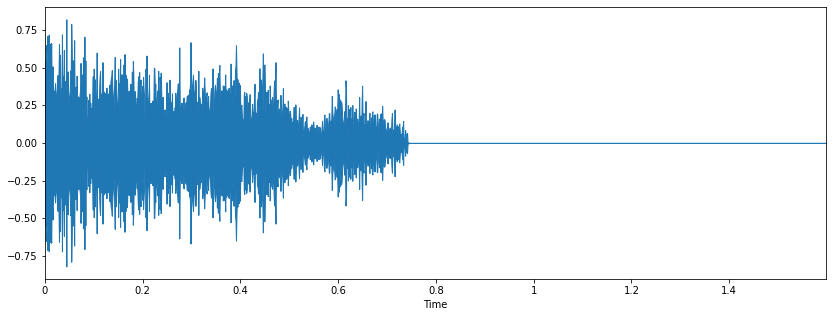

In [52]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

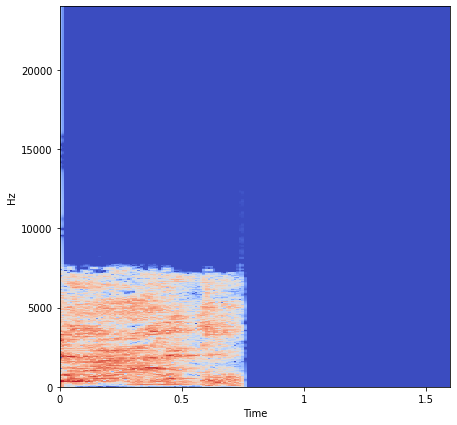

In [53]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 7))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [54]:
import numpy as np

In [55]:
def plot_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    
    # Make a new figure
    plt.figure(figsize=(5,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

    # Put a descriptive title on the plot
    plt.title('mel power spectrogram')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

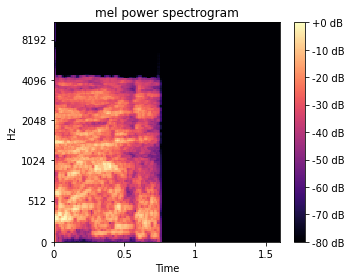

In [56]:
plot_spectrogram('pos-0422-096-cough-m-31-8.mp3')

In [64]:
from glob import glob

In [65]:
def save_spectrogram(audio_fname, image_fname):
    y, sr = librosa.load(audio_fname, sr=None)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    fig1 = plt.gcf()
    plt.axis('off')
    plt.show()
    plt.draw()
    fig1.savefig(image_fname, dpi=100)

def audio_to_spectrogram(audio_dir_path, image_dir_path=None):
    for paths in batch(audio_dir_path.ls(), 100):
        for audio_path in paths:
            audio_filename = get_filename(audio_path)
            image_fname = audio_filename.split('.')[0] + '.png'
            if image_dir_path:
                image_fname = image_dir_path.as_posix() + '/' + image_fname
            if Path(image_fname).exists(): continue
            print(image_fname)
            #plot_spectrogram(image_fname)
            try:
                save_spectrogram(audio_path.as_posix(), image_fname)
            except ValueError as verr:
                print('Failed to process %s %s' % (image_fname, verr))
        # wait between every batch for xyz seconds
        time.sleep(10)

In [70]:
for mp3 in glob('./drive/MyDrive/segmented/**/*.mp3'):
  print(mp3.split('/')[-1][:3])

pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg


In [73]:
tfms = fastai.transform.get_frequency_batch_transforms(n_fft=n_fft, 
                                      n_hop=n_hop, 
                                      n_mels=n_mels,
                                      sample_rate=sample_rate)
data = (AudioItemList
            .from_folder(NSYNTH_AUDIO)
            .split_by_folder()
            .label_from_re(instrument_family_pattern)
            .databunch(bs=batch_size, tfms=tfms))

NameError: ignored